In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# House prices prediction
Daniel Wurms 205681760  
https://www.kaggle.com/danielwurms  
In this competition we will try to predict house prices in Ames, Iowa.  
We will invistigate the data which is consisted of features like:
* The year the house was built
* The street the house is located
* The size of basement   
And many other features which are not necessarily being thought on when you buy a house.
![A house](https://ap.rdcpix.com/8e691dd844de49f9f78c073c1a10d2dal-m3680229580od-w480_h360.jpg)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import plotly.express as px
import plotly.graph_objects as go



# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# Understanding The Data
Here we will try to understand how is the data built,  
and how is our traget(SalePrice) looking

In [3]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
combined = [train_df, test_df]

In [4]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.info()
print('_'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.isna().any()
# not helpful in my opinion

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [8]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

we can see we have no missing values in the price field and that none is zero


Let's try and understand SalePrice a bit

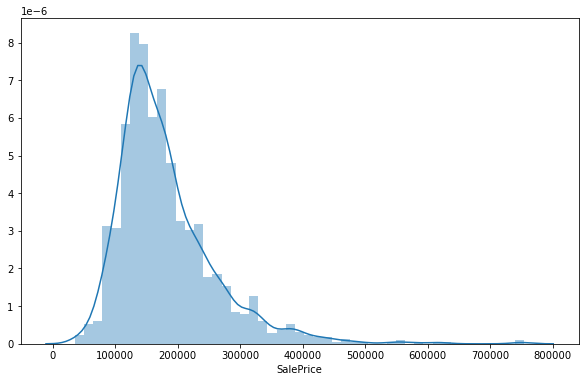

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.distplot(train_df['SalePrice'],ax=ax)

We can see that SalePrice in not distributing noramally,   
we'll ivistigate it more in the next section

In [10]:
def scatter_creator(x_val, y_val,data_frame):
    plt.figure(figsize=(13,7))
    sns.scatterplot(data=data_frame, x=x_val , y=y_val, palette='pastel', s=150)
    

# Correlation with all features


Now let's beging to unsderstand which features are working best  
with SalePrice in order for us to get the best results.

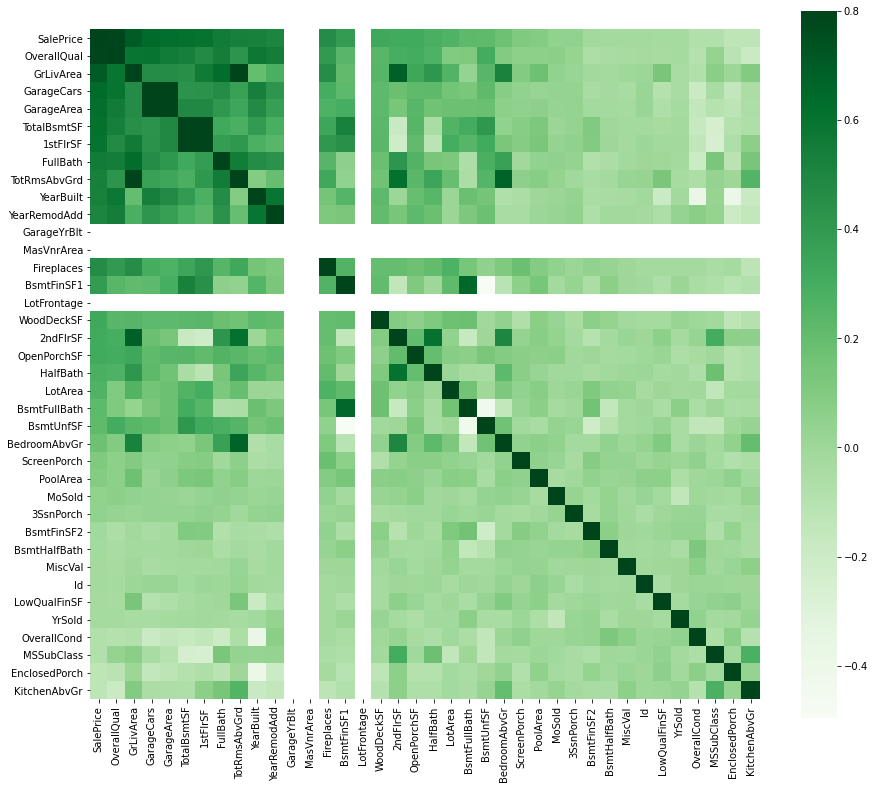

In [11]:
cor = train_df.corr()
cols = train_df.corr().nlargest(80, 'SalePrice')['SalePrice'].index
cor_0 =  np.corrcoef(train_df[cols].values.T)
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(cor_0,vmax=0.8, cmap=plt.cm.Greens, square=True,yticklabels=cols.values, xticklabels=cols.values)

**Correlating the features with the highest correlation values**  
now we'll take the 11 best correlated features to SalePrice,  
and invistigate them further

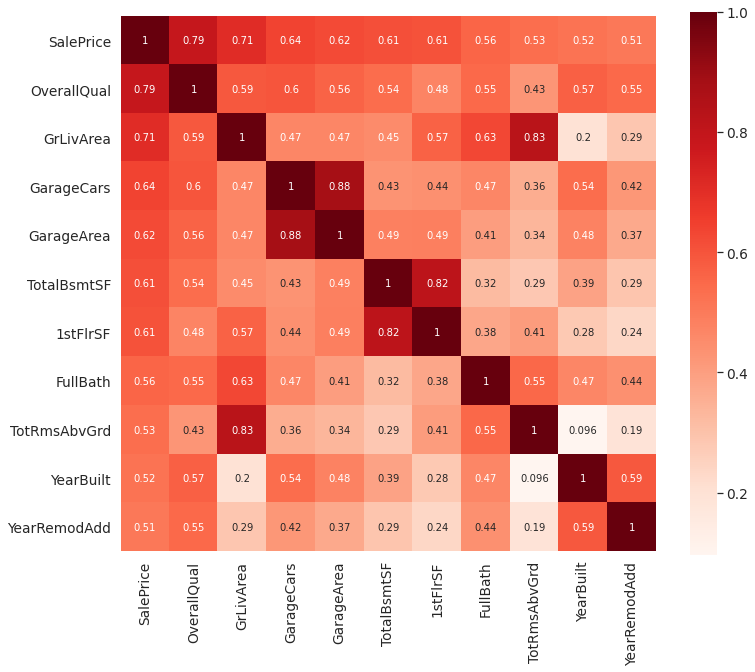

In [12]:
plt.figure(figsize=(12,10))
cor_num = 11
cols = cor.nlargest(cor_num, 'SalePrice')['SalePrice'].index
cor_2 = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cor_2, annot=True,cmap=plt.cm.Reds, square=True,  annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Correlation with SalePrice thoughts:**
* OverallQual and GrLivArea are most correlated with SalePrice, we will analyze it for sure
* GarageCars and GarageArea are related so maybe we can use only one of them
* TotalBsmtSF and 1stFltSF has the same correlation values with SalePrice, we'll consider to use only one of them
* FullBath, TotRmsAbvGrd and YearBuilt have some correlation with SalePrice, maybe we'll use it and maybe not

# Let's visualize the best correlating features


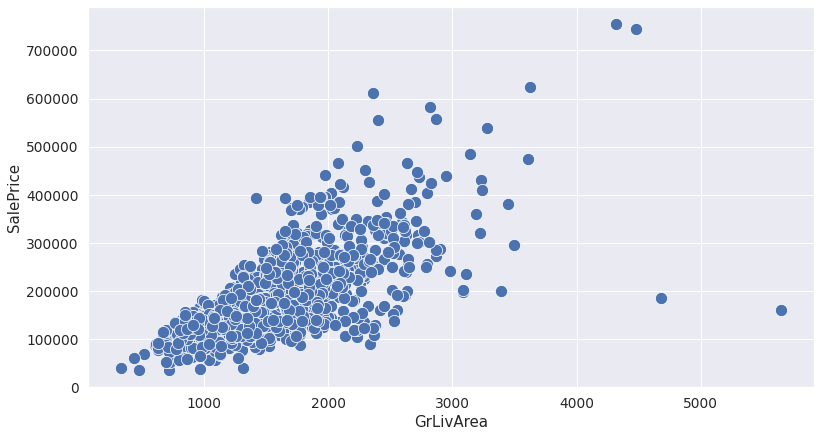

In [13]:
scatter_creator('GrLivArea', 'SalePrice', train_df)

we can see there os a **linear correlation** between GrLivArea and SalePrice


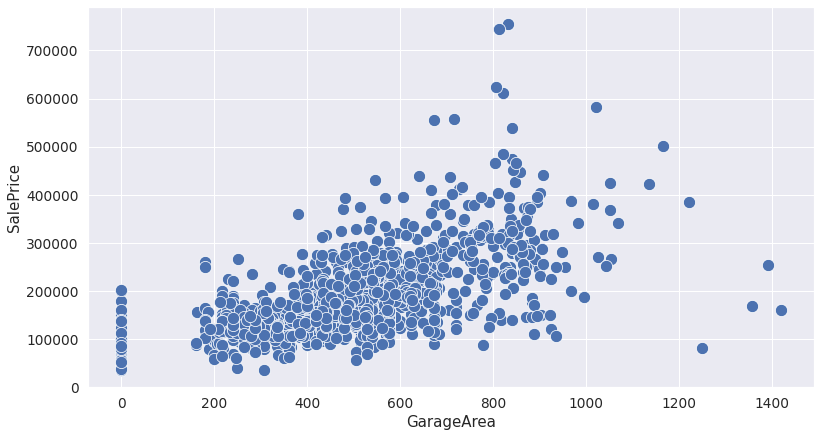

In [14]:
scatter_creator('GarageArea', 'SalePrice', train_df)

We can see that GarageArea is a bit too scatterd

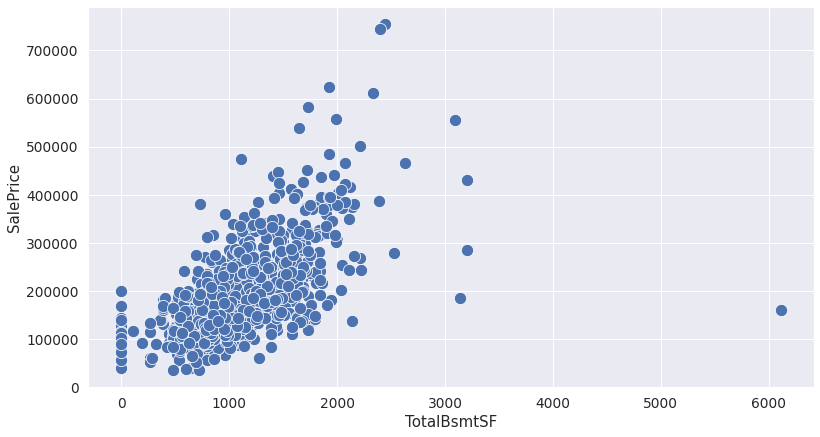

In [15]:
scatter_creator('TotalBsmtSF', 'SalePrice', train_df)

In [16]:
def violin_plot(x_val, y_val,data_frame):
#     plt.figure(figsize=(15,12))
    f, ax = plt.subplots(figsize=(16, 8))
    
    ax = sns.violinplot(x=x_val, y=y_val, data=data_frame, inner=None)
    plt.setp(ax.collections, alpha=.3)
    sns.stripplot(x=x_val, y=y_val, data=data_frame)
    plt.xticks(rotation=45);


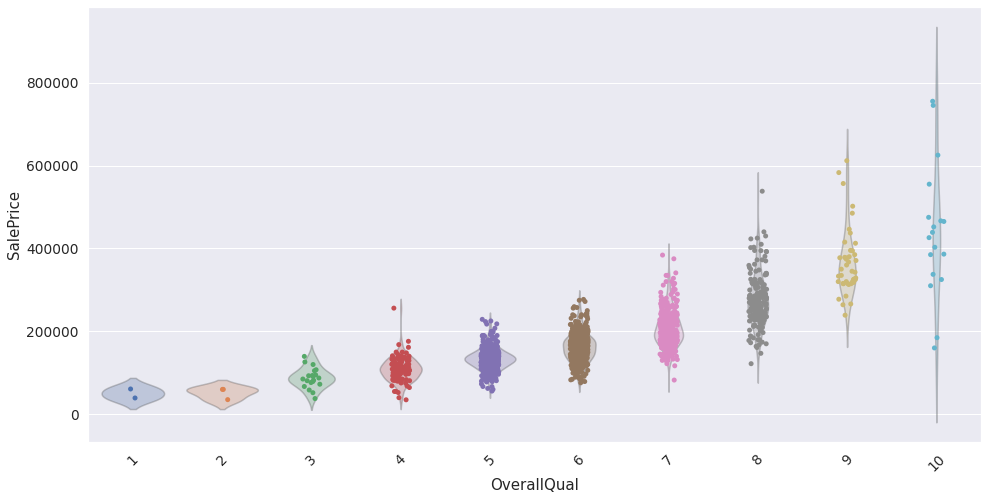

In [17]:
violin_plot('OverallQual', 'SalePrice', train_df)

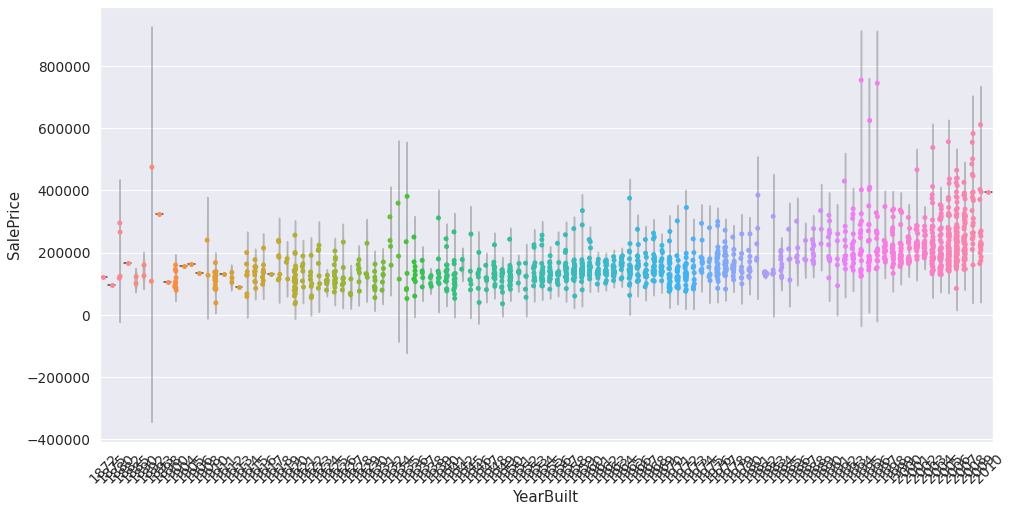

In [18]:
violin_plot('YearBuilt', 'SalePrice', train_df)

**Let's create a scatter plot between SalePrice and the correlated variables**

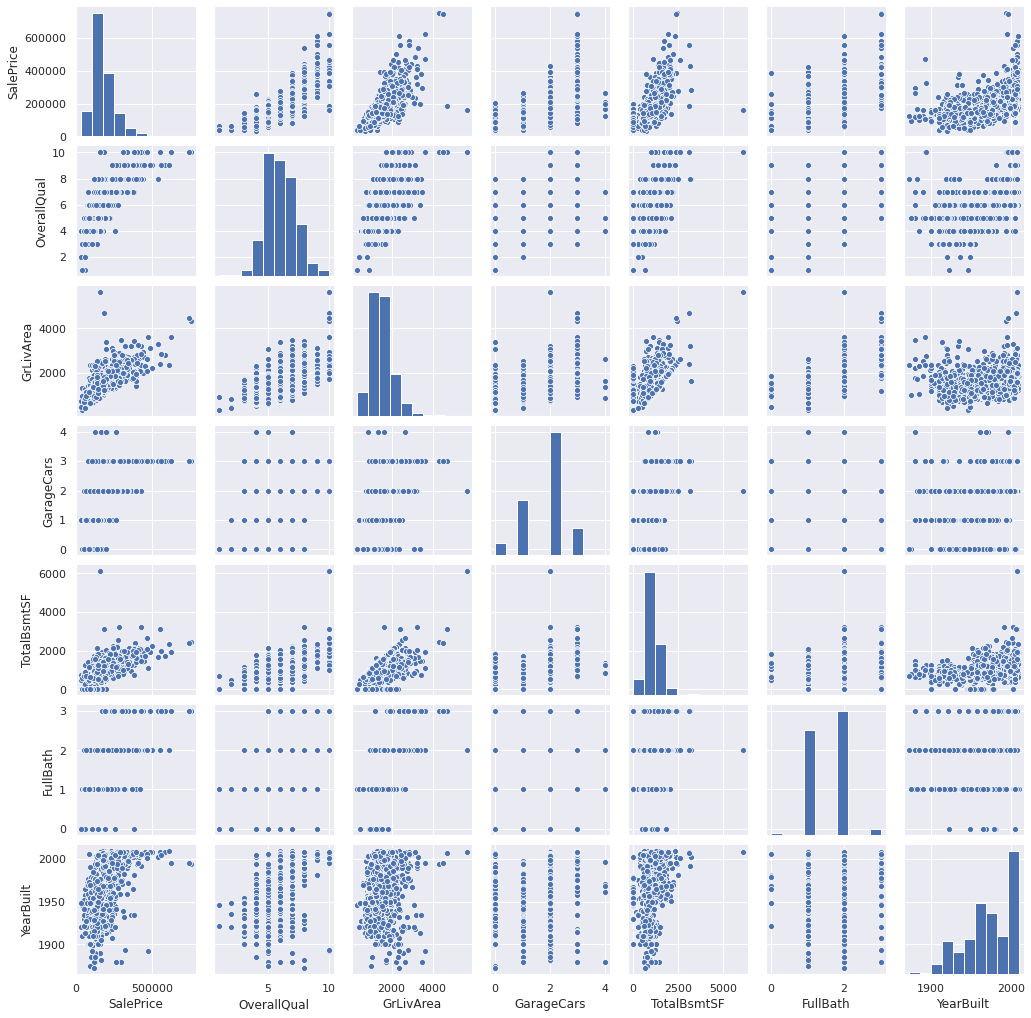

In [19]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 2)
plt.show();

# Dealing with null values


In [20]:
def drop_vals_prep(df):
    total_of_misses = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/train_df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total_of_misses, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


In [21]:

missing_data = drop_vals_prep(train_df)
missing_data.head(21)


,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


We'll drop the columns which has missing values, we can see they does not correlate strongly with SalePrice
therefore we wont miss these values.

In [22]:
missing_tst_data = drop_vals_prep(test_df)
missing_tst_data.head(20)

,Total,Percent
PoolQC,1456.0,99.726027
MiscFeature,1408.0,96.438356
Alley,1352.0,92.602740
Fence,1169.0,80.068493
FireplaceQu,730.0,50.000000
LotFrontage,227.0,15.547945
GarageCond,78.0,5.342466
GarageQual,78.0,5.342466
GarageYrBlt,78.0,5.342466
GarageFinish,78.0,5.342466


Here we delete the missing values which are in the train,  
and fill the rest of the missing values in the test with 0's

In [23]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
test_df = test_df.drop((missing_data[missing_data['Total'] > 1]).index,1)


In [24]:
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

In [25]:
test_df = test_df.fillna(0)

In [26]:
missing_tst_data = drop_vals_prep(test_df)
missing_tst_data.head(20)


,Total,Percent
SaleCondition,0.0,0.0
OverallQual,0.0,0.0
BsmtUnfSF,0.0,0.0
BsmtFinSF2,0.0,0.0
BsmtFinSF1,0.0,0.0
Foundation,0.0,0.0
ExterCond,0.0,0.0
ExterQual,0.0,0.0
Exterior2nd,0.0,0.0
Exterior1st,0.0,0.0


We can now se there are no empty values in test_df

# Taking care of outliars

Here we will deal with the outliars which can hurt our model

In [27]:
#deleting points
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

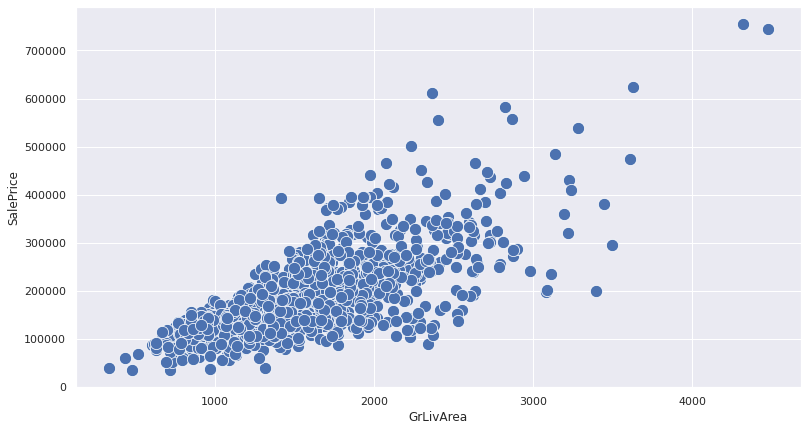

In [28]:
scatter_creator('GrLivArea', 'SalePrice', train_df)


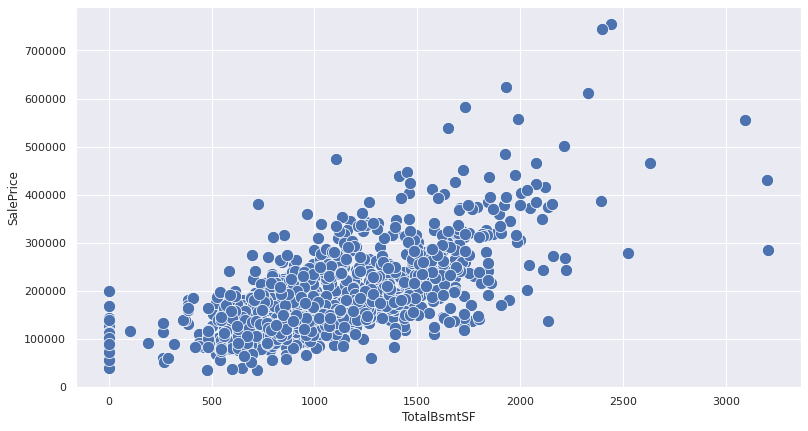

In [29]:
scatter_creator('TotalBsmtSF', 'SalePrice', train_df)


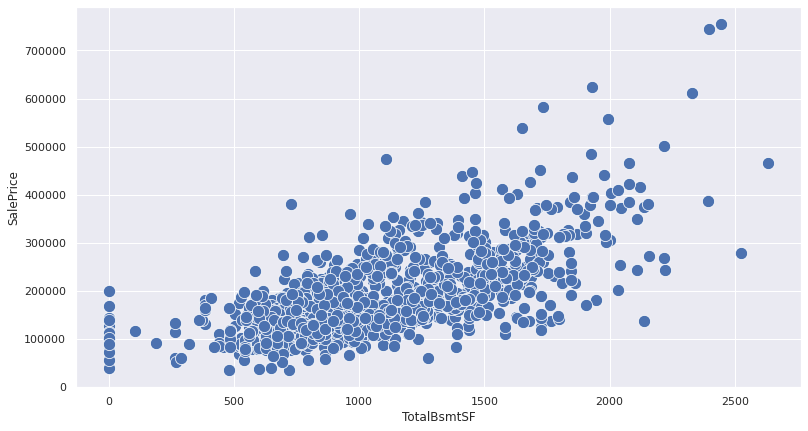

In [30]:
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>3000)].index)
scatter_creator('TotalBsmtSF', 'SalePrice', train_df)


In [31]:
train_df.reset_index(inplace=True, drop=True)

# Cross validation

In this case we will use the **KFOLD**(speed is preferable) CV method.  
but first we are going to split the data into X which holds all of the features except for the SalePrice,  
and into t which represents our target and will hold the SalePrice

In [32]:
t = train_df['SalePrice'].copy()
X = train_df.drop(['SalePrice','Id'], axis=1)
print('-'*25,"t",'-'*25)
display(t)
print('-'*25,"X",'-'*25)
display(X)

------------------------- t -------------------------


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1449    175000
1450    210000
1451    266500
1452    142125
1453    147500
Name: SalePrice, Length: 1454, dtype: int64

------------------------- X -------------------------


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1450,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1451,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal
1452,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,112,0,0,0,0,4,2010,WD,Normal


In [33]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

Now let's create a method to get R2 score and MSE loss

In [34]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train,squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

**Now we are going find out which features are categorical and which are numerical**

In [35]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = numerical_cols.tolist() + categorical_cols.tolist()


print('-'*25, 'Numerical Cols', '-'*25)
print(numerical_cols)
print('-'*25, 'Numerical Cols', '-'*25)
print(categorical_cols)
print('-'*28,'All Cols', '-'*28)
print(categorical_cols)

------------------------- Numerical Cols -------------------------
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
------------------------- Numerical Cols -------------------------
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical'

Now we will finaly run K-fold on our model and preset the Mean val score against the Mean train score in one graph,  
and in the second graph we will present the Mean val loss against the Mean train loss.

In [36]:
ct_1 = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe_1 = make_pipeline(ct_1, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe_1, transformer=ct_1, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.89
mean cv val loss 25408.72
mean cv val score: 0.92
mean cv val loss 22424.54


As we can see train was more stable in both graphs,  
and the validation was unstable becase it was completely different in each fold(which caused the spikes)

**Choosing our features**  
Now, we will choose our best features to work on, as we already know there is a large amount of features  
and we want to hand pick the ones that works best for us.  


In [37]:

ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(SGDRegressor(max_iter=2000, random_state=1), cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)).fit(X_encoded, t)
display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

,LotArea,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,HalfBath,BedroomAbvGr,Fireplaces,...,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,LotShape,LandContour,LotConfig,Condition1,RoofMatl,Exterior1st
0,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,2.0,6.0,2.0,4.0,-0.286575,-0.943846,-0.819693,0.398011,0.164295,-0.211909
1,1.0,3.0,0.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,...,3.0,6.0,2.0,4.0,-0.286575,-0.639375,0.287675,-0.487643,0.164295,-0.211909
2,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,2.0,6.0,2.0,4.0,-0.286575,-0.298550,-0.645132,0.548256,0.164295,-0.211909
3,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,0.0,1.0,...,2.0,6.0,2.0,0.0,-0.286575,-0.057700,-0.533304,0.411849,0.164295,-0.211909
4,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,2.0,6.0,2.0,4.0,-0.286575,-0.171308,-0.031443,1.362741,1.389347,-0.211909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,3.0,6.0,2.0,4.0,-0.286575,0.880706,-0.555124,0.273466,0.164295,-0.211909
1450,1.0,3.0,0.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,...,3.0,2.0,2.0,4.0,0.727987,0.053637,2.499683,1.115628,0.164295,-0.211909
1451,1.0,3.0,0.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,...,2.0,6.0,2.0,4.0,-0.286575,0.708021,0.085840,1.643461,1.389347,-0.211909
1452,1.0,3.0,0.0,2.0,2.0,2.0,3.0,4.0,1.0,1.0,...,2.0,6.0,2.0,4.0,6.118238,-1.284671,-0.214186,-0.851394,-1.060757,-0.211909


As we can see we should take 22 features in order to get the best result 

In [38]:
best_features = X_encoded.loc[:, selector.support_].keys()
print(len(best_features))
best_features

21


Index(['LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'LotShape', 'LandContour', 'LotConfig', 'Condition1', 'RoofMatl',
       'Exterior1st'],
      dtype='object')

# Testing the models

We now know what are the best features for this model, and now we'll beging the testing phase!

In [39]:
t_train = train_df['SalePrice'].copy()
X_train = X_encoded.loc[:, selector.support_]
X_train.head()

,LotArea,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,HalfBath,BedroomAbvGr,Fireplaces,...,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,LotShape,LandContour,LotConfig,Condition1,RoofMatl,Exterior1st
0,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,2.0,6.0,2.0,4.0,-0.286575,-0.943846,-0.819693,0.398011,0.164295,-0.211909
1,1.0,3.0,0.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,...,3.0,6.0,2.0,4.0,-0.286575,-0.639375,0.287675,-0.487643,0.164295,-0.211909
2,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,2.0,6.0,2.0,4.0,-0.286575,-0.298550,-0.645132,0.548256,0.164295,-0.211909
3,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,0.0,1.0,...,2.0,6.0,2.0,0.0,-0.286575,-0.057700,-0.533304,0.411849,0.164295,-0.211909
4,1.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,2.0,6.0,2.0,4.0,-0.286575,-0.171308,-0.031443,1.362741,1.389347,-0.211909


In [40]:
X_train.shape

(1454, 21)

In [41]:
numerical_cols_train = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_train = X_train.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols_train.tolist() + numerical_cols_train.tolist()


ct_2 = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols_train),
    ("standard", StandardScaler(), numerical_cols_train)])
model_pipe_2 = make_pipeline(ct_2, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_train, t, model_pipe_2, transformer=ct_2, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

X_train_encoded = ct_2.fit_transform(X_train)




mean cv val score: 0.80
mean cv val loss 34544.03
mean cv val score: 0.81
mean cv val loss 34142.81


we can see that the first model is doing better than the second model,   
so in that case we are going to use the first model in order to predict and test our model.


In [42]:
print(X_test.shape,'-'*50,'\n', X.columns.shape)

NameError: name 'X_test' is not defined

In [43]:
X_test = test_df.drop('Id', axis=1)


In [44]:
id_col = test_df['Id'].copy()
sol = model_pipe_1.predict(X_test)
print(sol)
my_sol = pd.DataFrame({
    "Id": id_col,
    "SalePrice": sol
})
my_sol.head()

[120160.72644165 169600.5666199  189552.10908313 ... 173721.34980596
 109227.5148025  239027.91772749]


,Id,SalePrice
0,1461,120160.726442
1,1462,169600.566620
2,1463,189552.109083
3,1464,198622.489618
4,1465,209947.821196


In [45]:

my_sol.to_csv('submission.csv', index=False)

We saw that the first model we created preforemed better than the second model,  
therefore I chose that the prediction will be commited on the First model.   
credits - https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python


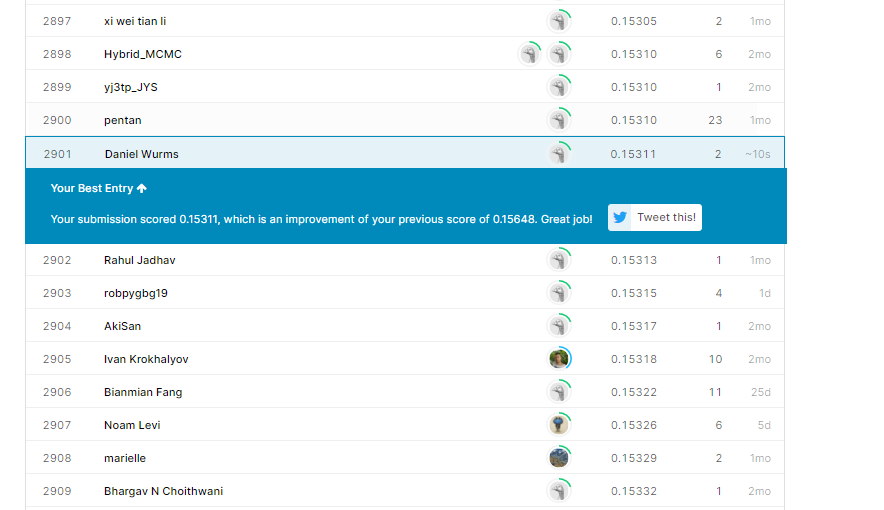